In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [2]:
country_list={'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Denmark',
 'Estonia', 'Finland', 'France', 'Germany' ,'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 
 'Latvia', 'Lithuania', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovenia', 
 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey'}

In [3]:
df = pd.read_csv('COVID-19_vaccination_rates.csv') 
df=df.loc[(df["date"]=="2021-10-25")]#.loc[(df["location"].isin(country_list))] # select date and countries
df=df[["location","people_fully_vaccinated_per_hundred"]] # reduce to countries and percentage of vaccinated ppl
df.rename(columns={'location': 'Country Name'}, inplace=True)
df=df.loc[(df["people_fully_vaccinated_per_hundred"]==df["people_fully_vaccinated_per_hundred"])]
df

,Country Name,people_fully_vaccinated_per_hundred
568,Africa,5.53
901,Albania,30.57
2713,Argentina,55.56
3219,Aruba,71.37
3578,Asia,41.54
...,...,...
65140,Vietnam,22.23
65472,Wales,70.69
65732,Wallis and Futuna,49.25
66097,World,37.62


In [4]:
df0 = pd.read_csv('gdp_per_capita.csv') 
df0=df0[["Country Name","2020"]] # select countries and reduce to gdp
df0.rename(columns={'2020': 'gdp_per_capita_2020'}, inplace=True)
df0=df0.loc[(df0["gdp_per_capita_2020"]==df0["gdp_per_capita_2020"])]

In [5]:
df0=df0.loc[(df0["gdp_per_capita_2020"]>30000)] ## we want spain, portugal,... -> 30000
data = pd.merge(df0, df, on=["Country Name"])
#data0 = pd.merge(df1, df, on=["Country Name"])
data0=data
data

,Country Name,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,Australia,52397.387048,61.01
1,Austria,55648.874565,62.03
2,Belgium,52626.581638,73.63
3,Bahrain,43739.561523,65.11
4,Canada,48090.992167,73.73
5,Switzerland,71760.586213,62.92
6,Cyprus,38458.191262,63.42
7,Germany,54263.649615,65.77
8,Denmark,60551.640172,75.72
9,Spain,38343.155224,79.69


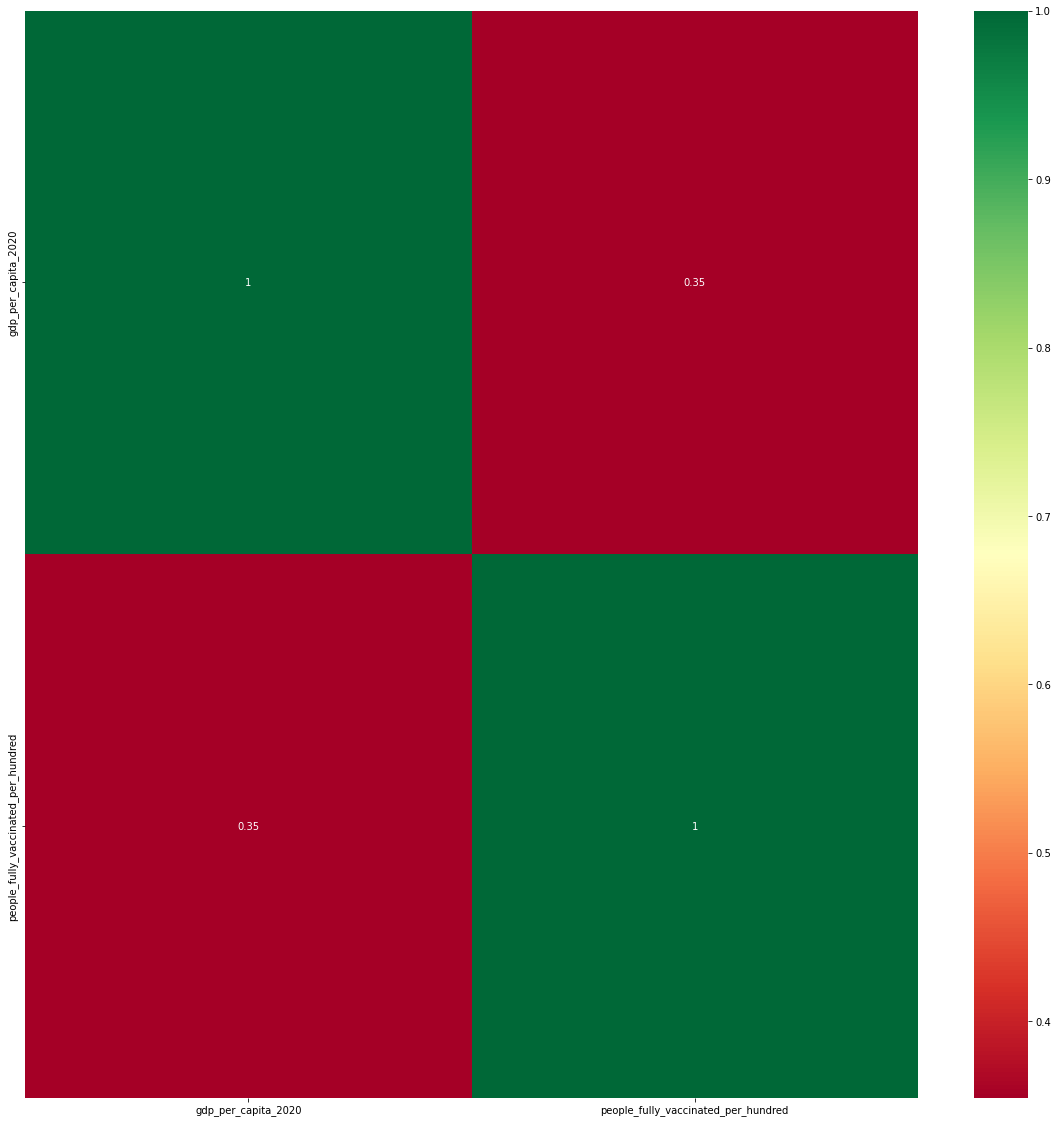

In [6]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['gdp_per_capita_2020', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [7]:
#trust_ingovernment_2019
df0 = pd.read_csv('trust_in_government.csv')  
df0 = df0.loc[(df0["TIME"]==2019)][["LOCATION","Value"]]
df0.rename(columns={"Value": "trust_in_government_2019"}, inplace=True) #40
df1 = pd.read_csv('betterlifeindex_2019.csv')[["LOCATION","Country"]]
df1.rename(columns={"Country": "Country Name"}, inplace=True) #40
data = pd.merge(df0, df1, on=["LOCATION"]).drop_duplicates().reset_index()[["trust_in_government_2019", "Country Name"]]
data = pd.merge(data, data0, on=["Country Name"])

full_data = data
data

,trust_in_government_2019,Country Name,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,46.870001,Australia,52397.387048,61.01
1,51.233826,Austria,55648.874565,62.03
2,32.790115,Belgium,52626.581638,73.63
3,54.928097,Canada,48090.992167,73.73
4,63.299903,Denmark,60551.640172,75.72
5,63.918815,Finland,50810.527408,68.51
6,38.184924,France,46712.010113,67.70
7,56.846043,Germany,54263.649615,65.77
8,48.393419,Hungary,33253.880030,59.39
9,58.121598,Ireland,95237.241299,75.23


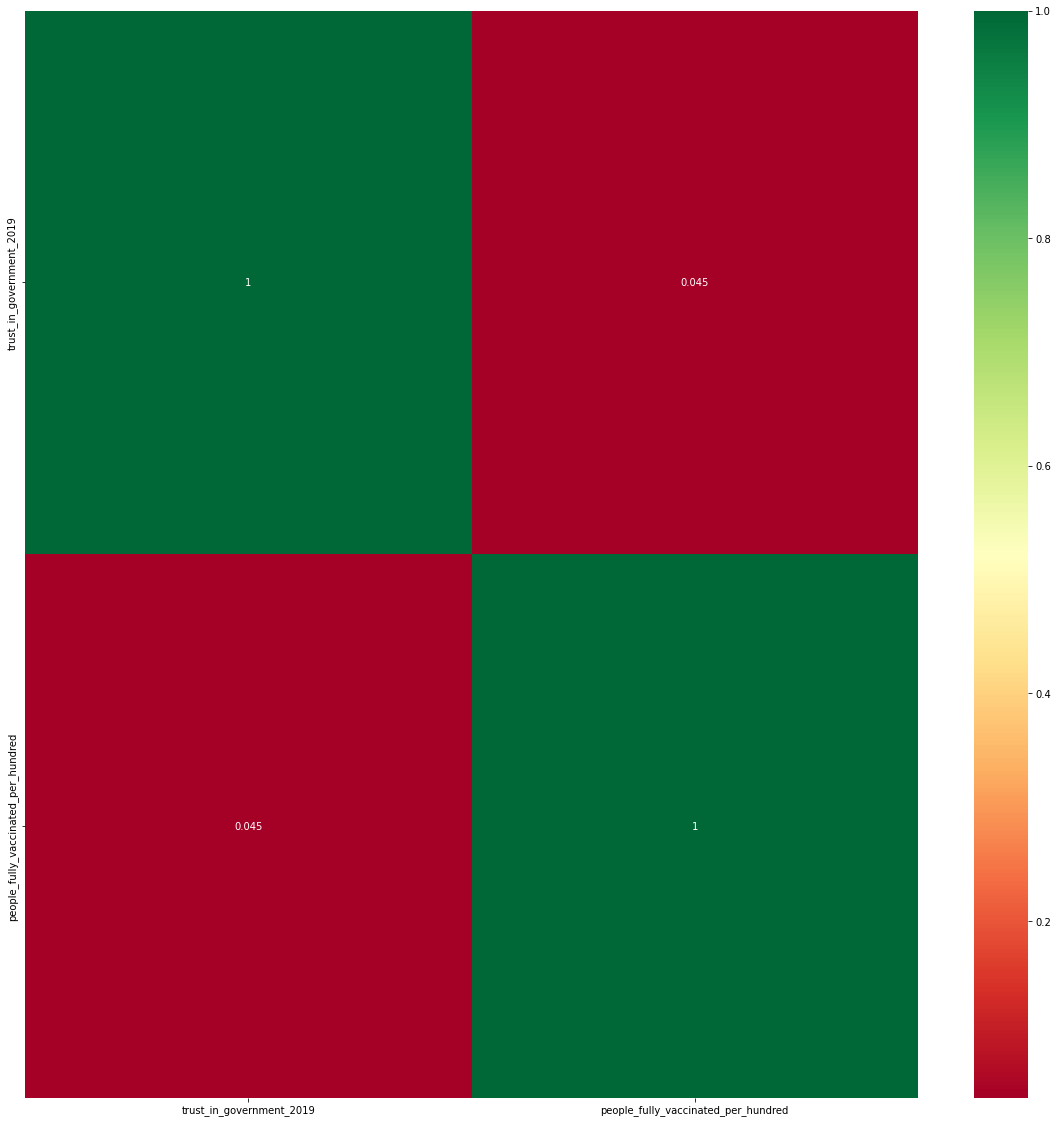

In [8]:
corrmat = data.corr()                           # nothing
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['trust_in_government_2019', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [9]:
df4 = pd.read_csv('secondary_education.csv')  
df4 = df4.loc[(df4["TIME"]==2019)].loc[(df4["SUBJECT"]=="UPPSRY")][["LOCATION","Value"]]
df4.rename(columns={"Value": "secondary_education_2019"}, inplace=True)
data = pd.merge(df4, df1, on=["LOCATION"]).drop_duplicates().reset_index()[["Country Name","secondary_education_2019"]]
full_data = pd.merge(data, full_data, on=["Country Name"])

data.rename(columns={"Country": "Country Name"}, inplace=True) #40
data = pd.merge(data, data0, on=["Country Name"])
full_data

,Country Name,secondary_education_2019,trust_in_government_2019,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,Austria,77.636,51.233826,55648.874565,62.03
1,Belgium,77.047,32.790115,52626.581638,73.63
2,Canada,84.317,54.928097,48090.992167,73.73
3,Denmark,81.629,63.299903,60551.640172,75.72
4,Finland,84.907,63.918815,50810.527408,68.51
5,Germany,73.092,56.846043,54263.649615,65.77
6,Hungary,77.257,48.393419,33253.880030,59.39
7,Italy,89.629,22.192586,41890.208794,70.92
8,New Zealand,85.911,67.520084,44212.876475,58.40
9,Norway,83.578,59.798701,63287.607008,68.28


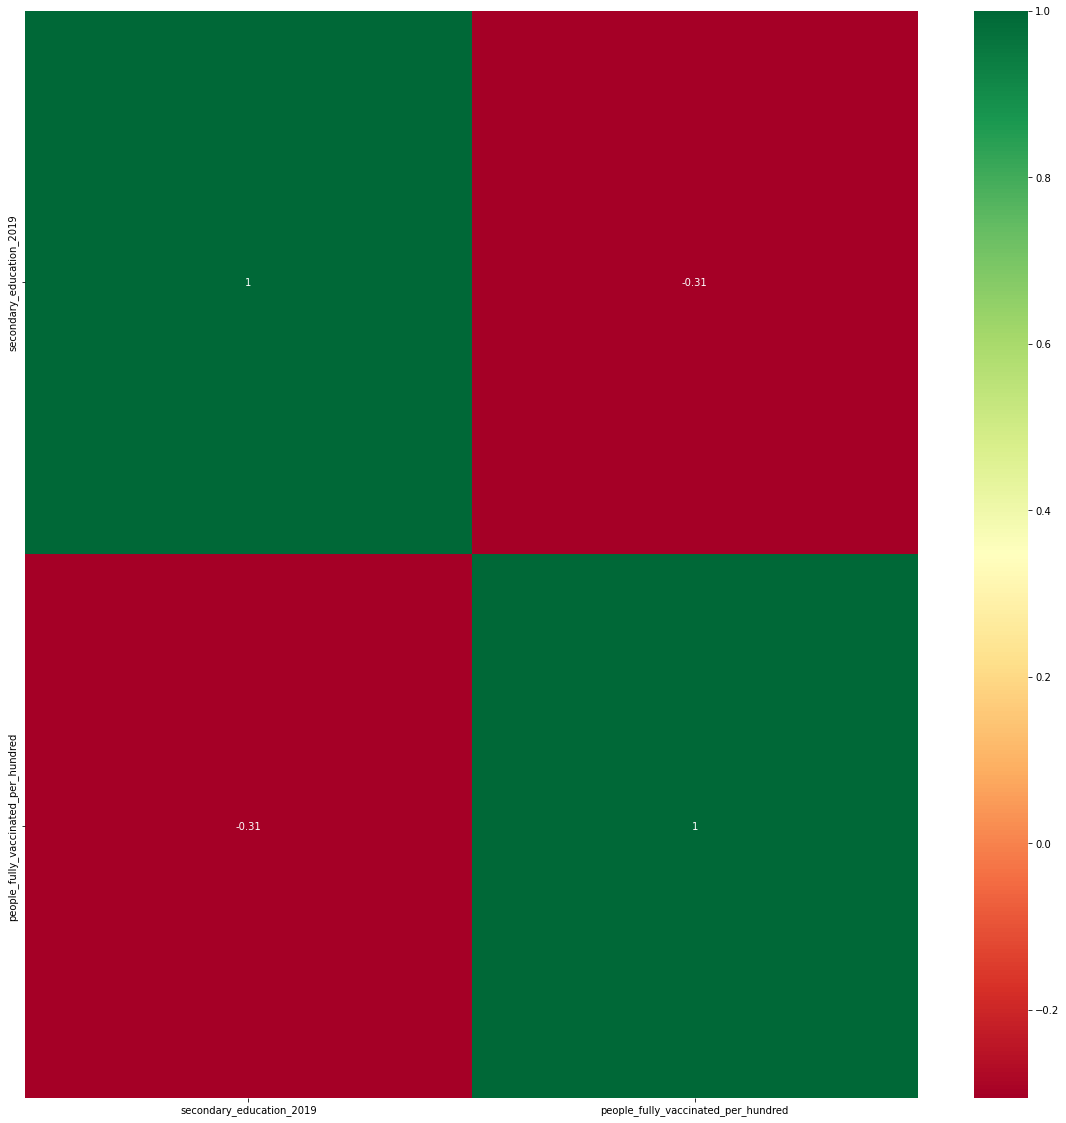

In [10]:
corrmat = data.corr()                     ## leichte tendenz dagegen! (fragwürdig bei 13 Ländern) ##gleich bei 20
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['secondary_education_2019', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [11]:
df4 = pd.read_csv('tertiary_education.csv')[["LOCATION","SUBJECT", "TIME", "Value"]]
df4 = df4.loc[(df4["TIME"]==2019)].loc[(df4["SUBJECT"]=="BACHR_MEN")|(df4["SUBJECT"]=="BACHR_WOMEN")]
df4.rename(columns={"Value": "tertiary_education_2019"}, inplace=True)


df4 = df4.pivot(index="LOCATION", columns="SUBJECT", values="tertiary_education_2019")
df4['tertiary_education_2019'] = df4["BACHR_MEN"] + df4['BACHR_WOMEN']
df4 = df4["tertiary_education_2019"].to_frame()
df4 = df4.reset_index() 
data = pd.merge(df4, df1, on=["LOCATION"]).drop_duplicates().reset_index()
data.rename(columns={"Country": "Country Name"}, inplace=True) #40
#full_data = pd.merge(data, full_data, on=["Country Name"])

data = pd.merge(data0, data, on=["Country Name"])
#full_data


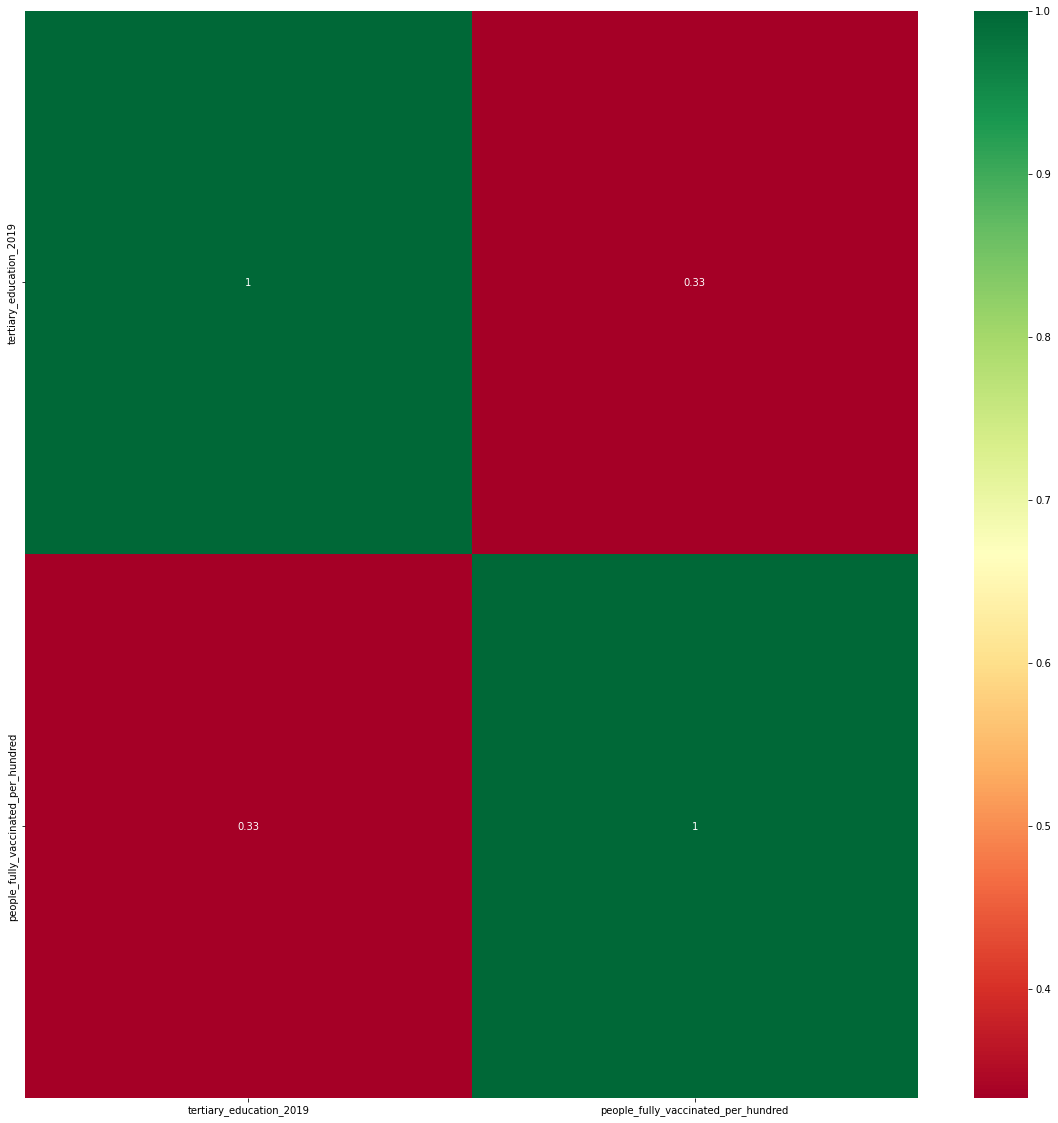

In [12]:
corrmat = data.corr()                    # tertiary towards education helps
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['tertiary_education_2019', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [13]:
df1 = pd.read_csv('unemployment_rate.csv') 
df1 = df1[["Country Name","2020"]] # select and reduce
df1.rename(columns={"2020": "unemplyment_2020"}, inplace=True)
df1=df1.loc[(df1["unemplyment_2020"]==df1["unemplyment_2020"])]
data = pd.merge(df1, data0, on=["Country Name"])
full_data = pd.merge(df1, full_data, on=["Country Name"])
full_data

,Country Name,unemplyment_2020,secondary_education_2019,trust_in_government_2019,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,Austria,5.77,77.636,51.233826,55648.874565,62.03
1,Belgium,6.01,77.047,32.790115,52626.581638,73.63
2,Canada,9.48,84.317,54.928097,48090.992167,73.73
3,Switzerland,4.94,83.669,80.661271,71760.586213,62.92
4,Germany,4.31,73.092,56.846043,54263.649615,65.77
5,Denmark,5.66,81.629,63.299903,60551.640172,75.72
6,Spain,15.67,74.744,36.778586,38343.155224,79.69
7,Estonia,6.46,80.195,40.330654,37925.116799,56.70
8,Finland,7.83,84.907,63.918815,50810.527408,68.51
9,United Kingdom,4.34,65.608,34.082886,45852.688886,66.83


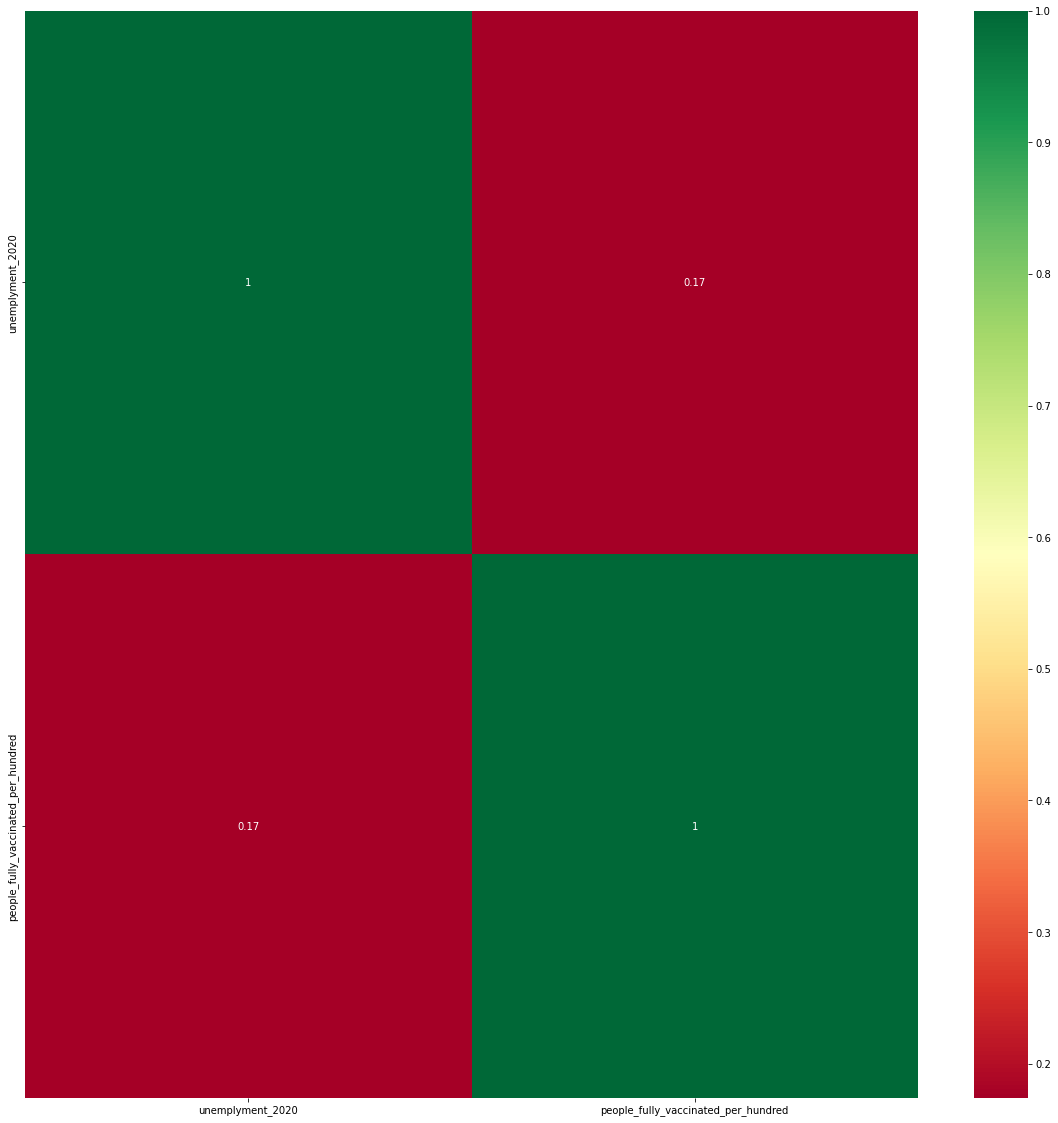

In [14]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['unemplyment_2020', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [15]:
cov_data = pd.read_csv('./worldwide_covid_data.csv')
cov_deaths = cov_data.rename(columns={'Country':'Country Name'})[['Country Name','Deaths/1M population']]
full_data = pd.merge(cov_deaths, full_data, on=["Country Name"])
full_data

,Country Name,Deaths/1M population,unemplyment_2020,secondary_education_2019,trust_in_government_2019,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,Austria,1273,5.77,77.636,51.233826,55648.874565,62.03
1,Belgium,2247,6.01,77.047,32.790115,52626.581638,73.63
2,Canada,765,9.48,84.317,54.928097,48090.992167,73.73
3,Denmark,471,5.66,81.629,63.299903,60551.640172,75.72
4,Estonia,1222,6.46,80.195,40.330654,37925.116799,56.70
5,Finland,218,7.83,84.907,63.918815,50810.527408,68.51
6,Germany,1157,4.31,73.092,56.846043,54263.649615,65.77
7,Hungary,3274,4.35,77.257,48.393419,33253.880030,59.39
8,Israel,872,4.61,89.991,49.566691,42390.877554,61.64
9,Italy,2196,9.31,89.629,22.192586,41890.208794,70.92


In [16]:
df7 = pd.read_csv('./betterlifeindex_2019.csv')

df7 = pd.read_csv('betterlifeindex_2019.csv')  
df7.rename(columns={"Country": "Country Name"}, inplace=True)
df7 = df7[["LOCATION", "Country Name","Indicator", "Value"]].loc[(df7["Inequality"]=="Total")]
df7 = df7.loc[(df7["Indicator"]=="Self-reported health")][["Country Name", "Value"]]
df7.rename(columns={"Value": "Self-reported_health_2019"}, inplace=True)
df7
full_data = pd.merge(df7, full_data, on=["Country Name"])
full_data


df7 = pd.read_csv('betterlifeindex_2019.csv')  
df7.rename(columns={"Country": "Country Name"}, inplace=True)
df7 = df7[["LOCATION", "Country Name","Indicator", "Value"]].loc[(df7["Inequality"]=="Total")]
df8 = df7.loc[(df7["Indicator"]=="Life expectancy")][["Country Name", "Value"]]
df8.rename(columns={"Value": "Life_expectancy_2019"}, inplace=True)
full_data = pd.merge(df8, full_data, on=["Country Name"])
full_data

,Country Name,Life_expectancy_2019,Self-reported_health_2019,Deaths/1M population,unemplyment_2020,secondary_education_2019,trust_in_government_2019,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,Austria,81.7,70.0,1273,5.77,77.636,51.233826,55648.874565,62.03
1,Belgium,81.5,74.0,2247,6.01,77.047,32.790115,52626.581638,73.63
2,Canada,81.9,88.0,765,9.48,84.317,54.928097,48090.992167,73.73
3,Denmark,80.9,71.0,471,5.66,81.629,63.299903,60551.640172,75.72
4,Finland,81.5,70.0,218,7.83,84.907,63.918815,50810.527408,68.51
5,Germany,81.1,65.0,1157,4.31,73.092,56.846043,54263.649615,65.77
6,Hungary,76.2,60.0,3274,4.35,77.257,48.393419,33253.880030,59.39
7,Italy,83.3,71.0,2196,9.31,89.629,22.192586,41890.208794,70.92
8,New Zealand,81.7,88.0,6,4.55,85.911,67.520084,44212.876475,58.40
9,Norway,82.5,77.0,169,4.62,83.578,59.798701,63287.607008,68.28


In [17]:
df7 = pd.read_csv('betterlifeindex_2019.csv')  
df7.rename(columns={"Country": "Country Name"}, inplace=True)
df7 = df7[["LOCATION", "Country Name","Indicator", "Value"]].loc[(df7["Inequality"]=="Total")]
df11 = df7.loc[(df7["Indicator"]=="Employees working very long hours")][["Country Name", "Value"]]
df11.rename(columns={"Value": "Employees_working_hours_2019"}, inplace=True)
full_data = pd.merge(df11, full_data, on=["Country Name"])
full_data

,Country Name,Employees_working_hours_2019,Life_expectancy_2019,Self-reported_health_2019,Deaths/1M population,unemplyment_2020,secondary_education_2019,trust_in_government_2019,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,Austria,6.66,81.7,70.0,1273,5.77,77.636,51.233826,55648.874565,62.03
1,Belgium,4.75,81.5,74.0,2247,6.01,77.047,32.790115,52626.581638,73.63
2,Canada,3.69,81.9,88.0,765,9.48,84.317,54.928097,48090.992167,73.73
3,Denmark,2.34,80.9,71.0,471,5.66,81.629,63.299903,60551.640172,75.72
4,Finland,3.81,81.5,70.0,218,7.83,84.907,63.918815,50810.527408,68.51
5,Germany,4.26,81.1,65.0,1157,4.31,73.092,56.846043,54263.649615,65.77
6,Hungary,3.03,76.2,60.0,3274,4.35,77.257,48.393419,33253.880030,59.39
7,Italy,4.11,83.3,71.0,2196,9.31,89.629,22.192586,41890.208794,70.92
8,New Zealand,15.11,81.7,88.0,6,4.55,85.911,67.520084,44212.876475,58.40
9,Norway,2.93,82.5,77.0,169,4.62,83.578,59.798701,63287.607008,68.28


In [21]:
full_data = full_data.drop(['Country Name'], axis=1)
full_data

,Employees_working_hours_2019,Life_expectancy_2019,Self-reported_health_2019,Deaths/1M population,unemplyment_2020,secondary_education_2019,trust_in_government_2019,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,6.66,81.7,70.0,1273,5.77,77.636,51.233826,55648.874565,62.03
1,4.75,81.5,74.0,2247,6.01,77.047,32.790115,52626.581638,73.63
2,3.69,81.9,88.0,765,9.48,84.317,54.928097,48090.992167,73.73
3,2.34,80.9,71.0,471,5.66,81.629,63.299903,60551.640172,75.72
4,3.81,81.5,70.0,218,7.83,84.907,63.918815,50810.527408,68.51
5,4.26,81.1,65.0,1157,4.31,73.092,56.846043,54263.649615,65.77
6,3.03,76.2,60.0,3274,4.35,77.257,48.393419,33253.880030,59.39
7,4.11,83.3,71.0,2196,9.31,89.629,22.192586,41890.208794,70.92
8,15.11,81.7,88.0,6,4.55,85.911,67.520084,44212.876475,58.40
9,2.93,82.5,77.0,169,4.62,83.578,59.798701,63287.607008,68.28


In [27]:
X = full_data[["Employees_working_hours_2019", "Life_expectancy_2019", "Self-reported_health_2019","Deaths/1M population", "unemplyment_2020","secondary_education_2019","trust_in_government_2019", "gdp_per_capita_2020"]]
Y = full_data["people_fully_vaccinated_per_hundred"]

[0.11318331 0.2371148  0.1490554  0.05576137 0.19841003 0.09116121
 0.03667989 0.11863399]


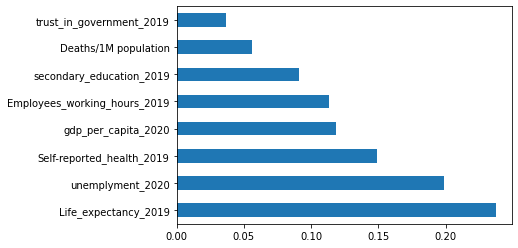

In [28]:
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

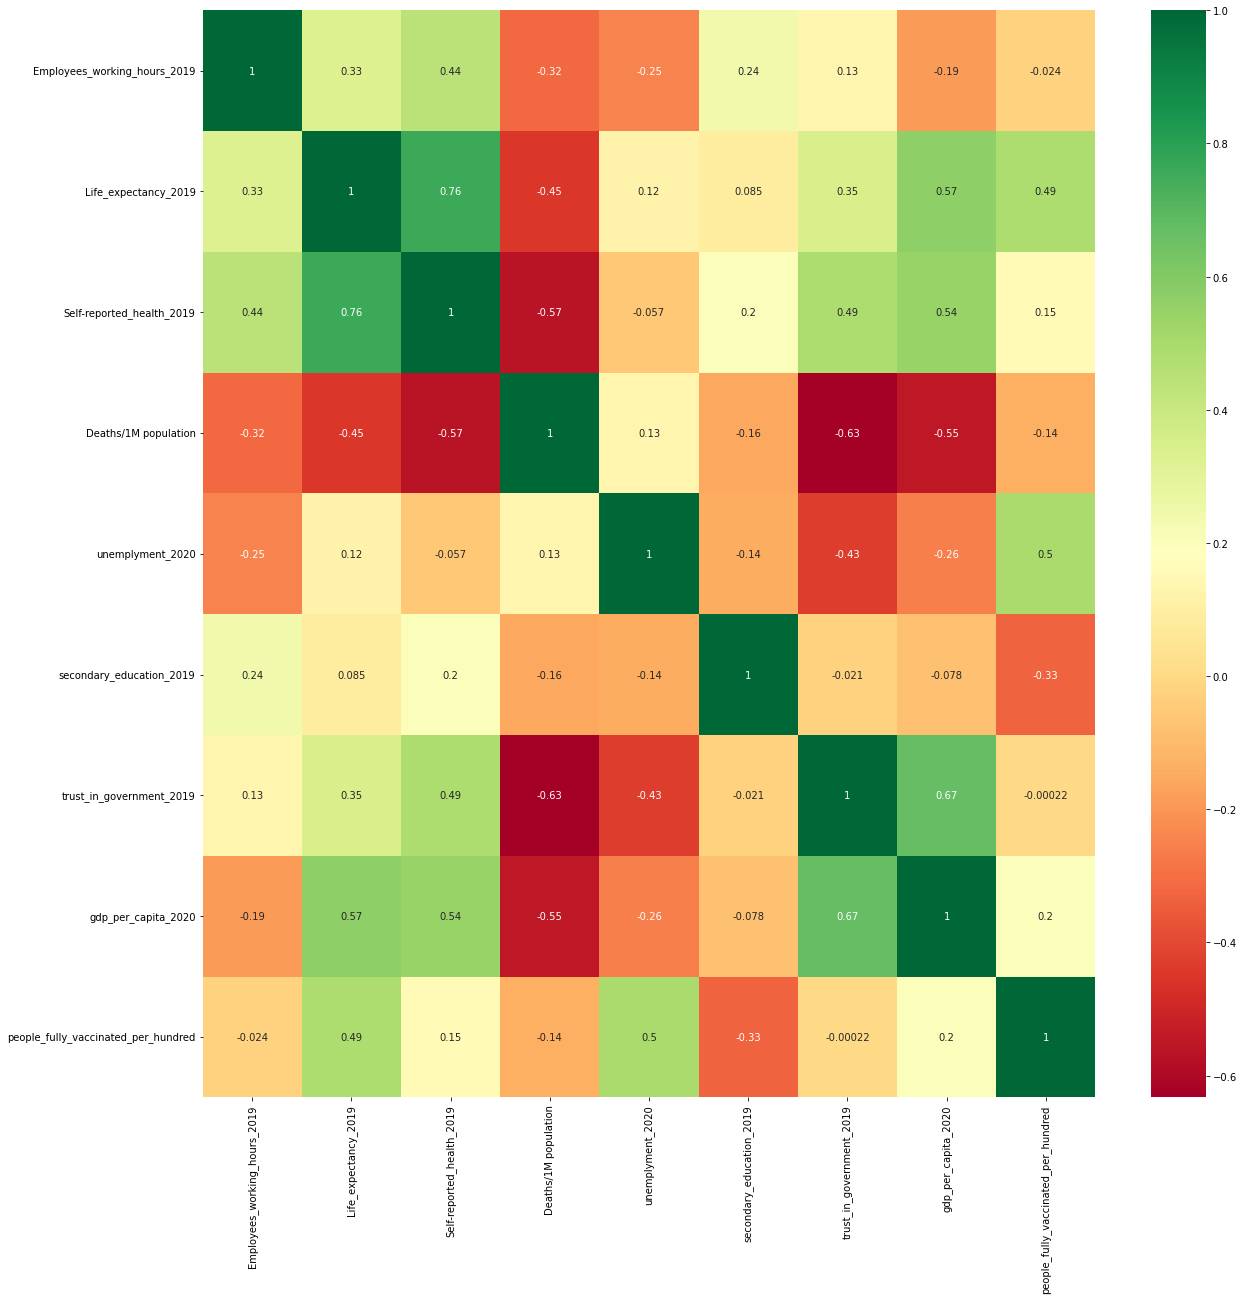

In [29]:
corrmat = full_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(full_data[["Employees_working_hours_2019", "Life_expectancy_2019", "Self-reported_health_2019","Deaths/1M population", "unemplyment_2020","secondary_education_2019","trust_in_government_2019", "gdp_per_capita_2020", "people_fully_vaccinated_per_hundred"]].corr(),annot=True,cmap="RdYlGn")

In [32]:
X_new = SelectKBest(f_regression, k=2).fit(X, Y)
dfscores = pd.DataFrame(X_new.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                          Specs         Score
4              unemplyment_2020  5.531282e+00
1          Life_expectancy_2019  5.237603e+00
5      secondary_education_2019  2.114998e+00
7           gdp_per_capita_2020  6.928741e-01
2     Self-reported_health_2019  4.157841e-01
3          Deaths/1M population  3.244511e-01
0  Employees_working_hours_2019  1.015262e-02
6      trust_in_government_2019  8.242054e-07


In [34]:
X_new = SelectKBest(mutual_info_regression, k=2).fit(X, Y)
dfscores = pd.DataFrame(X_new.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                          Specs     Score
2     Self-reported_health_2019  0.171066
7           gdp_per_capita_2020  0.161908
6      trust_in_government_2019  0.032619
3          Deaths/1M population  0.022925
4              unemplyment_2020  0.014289
5      secondary_education_2019  0.008974
0  Employees_working_hours_2019  0.000000
1          Life_expectancy_2019  0.000000
